### Antoine EDY
# Natural Language Processing (COMM061) - Coursework

In [1]:
import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import torch
import myutils

In [2]:
dataset = load_dataset("surrey-nlp/PLOD-CW")

In [3]:
TEXT2ID = {
    "B-O": 0,
    "B-AC": 1,
    "PAD": 2,
    "B-LF": 3,
    "I-LF": 4,
}
ID2TEXT = {v: k for k, v in TEXT2ID.items()}

print(f"TEXT2ID: {TEXT2ID}\nID2TEXT: {ID2TEXT}\n")

def preprocess(df):
    df = df.drop(columns=['pos_tags'])
    df = df.rename(columns={"ner_tags": "labels"})
    df["ids"] = df["labels"].apply(lambda x: [TEXT2ID[i] for i in x])
    df["sentences"] = df["tokens"].apply(lambda x: " ".join(x))

    return df


train_dataset = preprocess(pd.DataFrame(dataset['train']))
test_dataset = preprocess(pd.DataFrame(dataset['test']))
val_dataset = preprocess(pd.DataFrame(dataset['validation']))

train_dataset.info()


# Here the exploration to add at the end of the work.

TEXT2ID: {'B-O': 0, 'B-AC': 1, 'PAD': 2, 'B-LF': 3, 'I-LF': 4}
ID2TEXT: {0: 'B-O', 1: 'B-AC', 2: 'PAD', 3: 'B-LF', 4: 'I-LF'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tokens     1072 non-null   object
 1   labels     1072 non-null   object
 2   ids        1072 non-null   object
 3   sentences  1072 non-null   object
dtypes: object(4)
memory usage: 33.6+ KB


In [4]:
train_dataset.head()

,tokens,labels,ids,sentences
0,"[For, this, purpose, the, Gothenburg, Young, P...","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I...","[0, 0, 0, 0, 3, 4, 4, 4, 4, 0, 1, 0, 0, 0, 0]",For this purpose the Gothenburg Young Persons ...
1,"[The, following, physiological, traits, were, ...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF...","[0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 1, 0, 0, 0, 0, ...",The following physiological traits were measur...
2,"[Minor, H, antigen, alloimmune, responses, rea...","[B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, ...",Minor H antigen alloimmune responses readily o...
3,"[EPI, =, Echo, planar, imaging, .]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]","[1, 0, 3, 4, 4, 0]",EPI = Echo planar imaging .
4,"[Furthermore, ,, eNOS, -, derived, NO, S, -, n...","[B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","Furthermore , eNOS - derived NO S - nitrosylat..."


In [5]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

1072
126
153


In [6]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("surrey-nlp/roberta-base-finetuned-abbr")
model = AutoModelForTokenClassification.from_pretrained("surrey-nlp/roberta-base-finetuned-abbr")

In [7]:
#tokenize

X_train = tokenizer(list(train_dataset['sentences']), return_tensors="pt", padding=True, truncation=True, max_length=128)
X_val = tokenizer(list(val_dataset['sentences']), return_tensors="pt", padding=True, truncation=True, max_length=128)
X_test = tokenizer(list(test_dataset['sentences']), return_tensors="pt", padding=True, truncation=True, max_length=128)

In [8]:
from pipeline import Pipeline

pipe = Pipeline(model, tokenizer, test_dataset)
pipe.get_results()

(['Abbreviations',
  ':',
  'GEMS',
  ',',
  'Global',
  'Enteric',
  'Multicenter',
  'Study',
  ';',
  'VIP',
  ',',
  'ventilated',
  'improved',
  'pit',
  '.',
  'Fractions',
  'from',
  'FPLC',
  'purification',
  'were',
  'treated',
  'with',
  'Laemmli',
  'buffer',
  '[',
  '82',
  ']',
  'with',
  '10',
  'mM',
  '1,4',
  '-',
  'dithiothreitol',
  '(',
  'DTT',
  ')',
  'and',
  'heated',
  'for',
  '5',
  'm',
  'at',
  '85',
  '°',
  'C',
  'then',
  'analyzed',
  'on',
  'a',
  '4',
  '%',
  'to',
  '15',
  '%',
  'discontinuous',
  'SDS',
  'gel',
  'with',
  'a',
  '6',
  '%',
  'stacking',
  'gel',
  'run',
  'at',
  'ambient',
  'temperature',
  'at',
  'a',
  'constant',
  '100',
  'V.',
  'Two',
  'epithelial',
  'cytokines',
  'other',
  'than',
  'IL33',
  ',',
  'IL25',
  ',',
  'and',
  'thymic',
  'stromal',
  'lymphopoietin',
  '(',
  'TSLP',
  ')',
  'are',
  'known',
  'to',
  'activate',
  'ILC2',
  'in',
  'the',
  'lung',
  '[',
  '22,24',
  ']',
  '.',


In [9]:
pipe.vizu(400, 700)

Output:
journal 's policy and the authors of this manuscript have the following competing interests : DF , EJ , and NNL are staff members of the World Health Organization ( WHO ) . Characteristics were compared across the matched groups using standardized mean differences ( SMDs ) , with an SMD > 0.1 indicating a clinically important difference . Nutrients that are rich in seafood were selected to be included this study : protein , eicosapentaenoic acid ( EPA ) and docosahexaenoic acid ( DHA ) , vitamins ( A , D , B12 , and niacin ) , and minerals ( zinc and selenium , and iron ) . To test if this polymorphism modulates CD24 mRNA stability , we constructed two plasmids ( pTracer CMV2 - CD24TG and pTracer CMV2 - CD24del ; Figure 5 , top panel ) and transfected Chinese hamster ovary ( CHO ) cells with the two constructs . Blood pressure ( BP ) will be controlled after each visit . Briefly , Phenotypic Age is calculated using chronological age and 9 biomarkers ( albumin , creatinine , glu

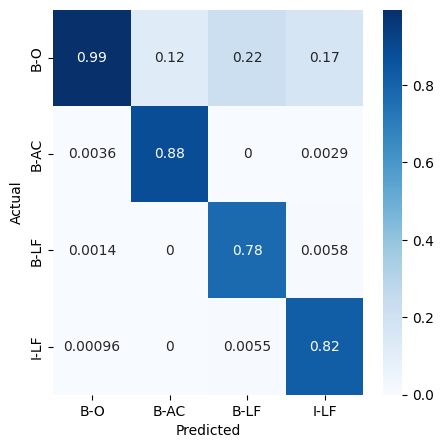

In [10]:
pipe.get_confusion_matrix()

### 3. NLP algorithms

Conditional Random Fields, RNNs, Transformers

In [11]:
from torch.utils.data import DataLoader, TensorDataset

train = TensorDataset(train_X, train_y)
val = TensorDataset(val_X, val_y)
test = TensorDataset(test_X, test_y)

train_loader = DataLoader(train, batch_size=32, shuffle=True)
val_loader = DataLoader(val, batch_size=32, shuffle=True)
test_loader = DataLoader(test, batch_size=32, shuffle=True)

NameError: name 'train_X' is not defined

In [ ]:
pipeline["algorithm"] = "pretrained" # rnn, pretrained
print_pipeline()

batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(train) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

from models import Models

model = Models(pipeline["algorithm"])

model.fit(train_loader, val_loader, num_epochs, input_dim=100)

model.



SyntaxError: invalid syntax (3891515695.py, line 16)

### 4. Loss functions and Optimisers

# 3. Testing

# 4. Best model

# 5. Final evaluation